# Author

***Written by Ho Sy The***

Hanoi University of Science and Technology

IT1 04 - K65.

*Github: https://github.com/hsthe29*

- **date: 2022-04-04**

# Summary

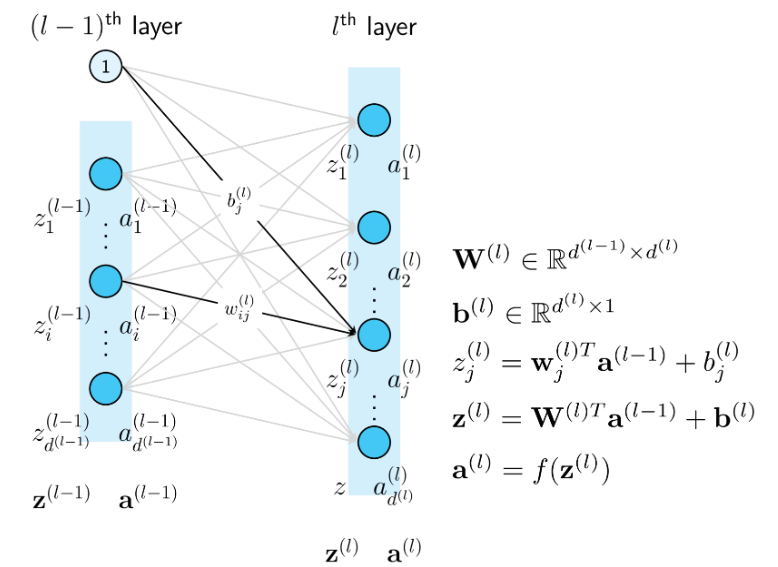

## Feedforward
$\begin{eqnarray}
\mathbf{a}^{(0)} &=& \mathbf{x} \\ 
z_{i}^{(l)} &=& \mathbf{w}_i^{(l)T}\mathbf{a}^{(l-1)} + b_i^{(l)} \\ 
\mathbf{z}^{(l)}  &=& \mathbf{W}^{(l)T}\mathbf{a}^{(l-1)} + \mathbf{b}^{(l)},~~ l =  1, 2, \dots, L \\
\mathbf{a}^{(l)} &=& f(\mathbf{z}^{(l)}), ~~ l =  1, 2, \dots, L \\
\mathbf{\hat{y}} &=& \mathbf{a}^{(L)}
\end{eqnarray}$

## Backpropagation for Stochastic Gradient Descent
1. Bước feedforward: Với 1 giá trị đầu vào $\mathbf{x}$, tính giá trị đầu ra của network, trong quá trình tính toán, lưu lại các activation 
$\mathbf{a}^{(l)}$ tại mỗi layer.

2. Với mỗi unit $j$ ở output layer, tính:  $e_j^{(L)} = \frac{\partial J}{\partial z_j^{(L)}}$

3. Với $l = L-1, L-2, …, 1$ tính:  $e_j^{(l)} = \left( \mathbf{w}_{j:}^{(l+1)} \mathbf{e}^{(l+1)} \right) f’(z_j^{(l)})$

4. Cập nhật đạo hàm cho từng hệ số:  $\begin{eqnarray}
\frac{\partial J}{\partial w_{ij}^{(l)}} &=& a_i^{(l-1)} e_j^{(l)} \ 
\frac{\partial J}{\partial b_{j}^{(l)}} &=& e_j^{(l)}
\end{eqnarray}$

$\begin{eqnarray}
\mathbf{E}^{(2)} &=& \frac{\partial J}{\partial \mathbf{Z}^{(2)}} =\frac{1}{N}(\mathbf{\hat{Y}} - \mathbf{Y}) \\ 
\frac{\partial J}{\partial \mathbf{W}^{(2)}} &=& \mathbf{A}^{(1)}  \mathbf{E}^{(2)T} \\ 
\frac{\partial J}{\partial \mathbf{b}^{(2)}} &=& \sum_{n=1}^N\mathbf{e}_n^{(2)} \\ 
\mathbf{E}^{(1)} &=& \left(\mathbf{W}^{(2)}\mathbf{E}^{(2)}\right) \odot f’(\mathbf{Z}^{(1)}) \\ 
\frac{\partial J}{\partial \mathbf{W}^{(1)}} &=& \mathbf{A}^{(0)}  \mathbf{E}^{(1)T} = \mathbf{X}\mathbf{E}^{(1)T}\\ 
\frac{\partial J}{\partial \mathbf{b}^{(1)}} &=& \sum_{n=1}^N\mathbf{e}_n^{(1)} \\ 
\end{eqnarray}$

- With last layer is Softmax Regression, we will prove that $\mathbf{E}^{(2)}=\frac{\partial J}{\partial \mathbf{Z}^{(2)}} =\frac{1}{N}(\mathbf{\hat{Y}} - \mathbf{Y})$ is true.
- Indeed, we consider a data point $\mathbf{x}_i$ and let $z_{ji} = \mathbf{w}_j^T\mathbf{x}_i + b_jj$:

$\begin{eqnarray}
J_i(\mathbf{W}) \triangleq J(\mathbf{W}; \mathbf{x}_i, \mathbf{y}_i) &=& \\
-\sum_{j = 1}^C y_{ji}\log\left(\frac{\exp(\mathbf{w}_j^T\mathbf{x}_i+b_j)}{\sum_{k=1}^C \exp(\mathbf{w}_k^T\mathbf{x}_i+b_k)}\right) \ 
&=& \\
-\sum_{j=1}^C\left(y_{ji} (\mathbf{w}_j^T\mathbf{x}_i + b_j) - y_{ji}\log\left(\sum_{k=1}^C \exp(\mathbf{w}_k^T\mathbf{x}_i+b_k)\right)\right) \ 
&=& \\
-\sum_{j=1}^C y_{ji} (\mathbf{w}_j^T\mathbf{x}_i + b_j) + \log\left(\sum_{k=1}^C \exp(\mathbf{w}_k^T\mathbf{x}_i + b_k)\right) &=& \\
-\sum_{j=1}^C y_{ji} z_{ji} + \log\left(\sum_{k=1}^C \exp(z_{ki})\right)
\end{eqnarray}$

$⇒ \frac{∂J_i(\mathbf{W})}{∂z_{ji}} = -y_{ji} + \frac{\exp(z_{ji})}{\sum_{k=1}^C \exp(z_{ki})} = a_{ji} - y_{ji}$. 
 - And $\frac{1}{N} $ is the coefficient that helps the calculations not to overflow.

For $\mathbf{Z} ~~(\mathbf{Z} \in \mathbf{R}^{C×N}), ~~ \text{we have} ~~\frac{∂J}{∂\mathbf{Z}} = \frac{1}{N}(\hat{\mathbf{Y}} - \mathbf{Y})$.

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
from dataclasses import dataclass
from keras.datasets import cifar10
from sklearn import datasets
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


In [ ]:
mnist = fetch_openml('mnist_784', cache=False)

In [ ]:
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'w']
descrb = ['s', 'o', '^', 'p', '<', '.', 'x', '*']

def visualize(X, y, C, a, b, mlp, lv):

  plt.figure(figsize=(10, 10))

  N = 200
  kc = 0.02
  x_ = np.arange(a, b, kc)
  y_ = np.arange(a, b, kc)
  l = len(x_)

  x_, y_ = np.meshgrid(x_, y_)
  xx = x_.reshape(-1)
  yy = y_.reshape(-1)
  X1 = np.vstack((xx, yy))
  z = mlp.predict(X1)
  z = z.reshape(l, l)

  plt.contourf(x_, y_, z, lv, cmap='jet', alpha = .3)
  
  for i in range(C):
    Xt = X[:, y == i]
    plt.plot(Xt[0], Xt[1], colors[i] + descrb[i], markersize = 6, markeredgecolor = 'k')

  plt.title(f'Training accuracy: {mlp.check_accuracy(X, y)}%')

  plt.show()

# MLP with 1 hidden layer

In [2]:
class MlpOneHiddenLayer:
  def __init__(self, C, hidden_units=10, eta = 1):
    self.eta = eta
    self.C = C
    self.d1 = hidden_units

  def softmax(self, Z):
    e_Z = np.exp(Z - np.max(Z, axis = 0, keepdims = True))
    return e_Z / e_Z.sum(axis = 0, keepdims = True)
    
  def convert_labels(self, y):
    Y = sparse.coo_matrix((np.ones_like(y),
          (y, np.arange(len(y)))), shape = (self.C, len(y))).toarray()
    return Y

  def loss_function(self, Y, Y_h):
    return -np.sum(Y*np.log(Y_h))/Y.shape[1]

  def init_W(self, d0):
    self.W1 = 0.02*np.random.randn(d0, self.d1)
    self.b1 = np.zeros((self.d1, 1))
    self.W2 = 0.02*np.random.randn(self.d1, self.C)
    self.b2 = np.zeros((self.C, 1))

  def predict(self, X):
    Z1 = self.W1.T @ X + self.b1
    A1 = np.maximum(Z1, 0)
    Z2 = self.W2.T @ A1 + self.b2
    
    return np.argmax(Z2, axis=0)
  
  def fit(self, X, y, batch_size=0, epochs=10001):
    if batch_size == 0:
      batch_size = X.shape[1]
    else:
      if X.shape[1] % batch_size != 0:
        raise ValueError('number of data points must be divisible by batch_size!')
    self.init_W(X.shape[0])
    Y = self.convert_labels(y)
    iter_per_epoch = X.shape[1] // batch_size
    self.loss_ = []
    it = 0
    for i in range(epochs):
      mix_id = np.random.permutation(X.shape[1])
      for j in range(iter_per_epoch):
        id = mix_id[range(j * batch_size, (j + 1) * batch_size)]

        Yt = Y[:, id]
        Xt = X[:, id]

        # Feedforward
        Z1 = self.W1.T @ Xt + self.b1 # d1 x d0, d0 x n -> d1 x n
        A1 = np.maximum(Z1, 0)
        Z2 = self.W2.T @ A1 + self.b2
        Y_h = self.softmax(Z2)

        loss_temp = self.loss_function(Yt, Y_h)

        # Backpropagation
        E2 = (Y_h - Yt) / Yt.shape[1]
        dW2 = A1 @ E2.T  # d1 x n, n x d2
        db2 = np.sum(E2, axis=1, keepdims=True) # [d2, n] -> [d2, 1]
        E1 = self.W2 @ E2
        E1[Z1 <= 0] = 0
        dW1 = Xt @ E1.T
        db1 = np.sum(E1, axis=1, keepdims=True)

        self.W1 -= self.eta * dW1
        self.b1 -= self.eta * db1
        self.W2 -= self.eta * dW2
        self.b2 -= self.eta * db2

      if i % 1000 == 0:
        self.loss_.append(loss_temp)

  def weight_(self):
    return self.W1, self.b1, self.W2, self.b2
  
  def visualize(self, X, y, x_axis, y_axis, n_=500, level_sets=200, dpi=100):
    plt.figure(dpi=dpi)

    x_ = np.linspace(x_axis[0], x_axis[1], n_)
    y_ = np.linspace(y_axis[0], y_axis[1], n_)

    x_, y_ = np.meshgrid(x_, y_)

    xx = x_.reshape(-1)
    yy = y_.reshape(-1)
    x = np.vstack((xx, yy))
    z = self.predict(x)
    z = z.reshape(n_, n_)

    plt.contourf(x_, y_, z, level_sets, cmap='jet', alpha = .3)

    plt.scatter(X[0], X[1], s=50, c=y) #, markeredgecolor='k')

    plt.scatter(X[0], X[1], s=50,
                   linewidth=1, marker='o', facecolors='none', edgecolors='k')
      
    plt.axis('tight')
    plt.title(f'accuracy rate: {accuracy_score(y, self.predict(X)) * 100}%')

    plt.show()


# MLP with any hidden layers

In [3]:
class Units:
  W: np.ndarray = np.array([])
  Z: np.ndarray = np.array([])
  A: np.ndarray = np.array([])
  b: np.ndarray  = np.array([])

class Mlp:

  fitted = False
  
  def __init__(self, C, units, eta = 1):
    self.eta = eta
    self.C = C
    self.__nlayers = len(units) - 2
    self.units = units
    self.__layers = []

  def __ReLU(self, Z):
    return np.maximum(Z, 0)

  def __softmax(self, Z):
    e_Z = np.exp(Z - np.max(Z, axis = 0, keepdims = True))
    return e_Z / e_Z.sum(axis = 0, keepdims = True)
    
  def convert_labels(self, y):
    Y = sparse.coo_matrix((np.ones_like(y),
          (y, np.arange(len(y)))), shape = (self.C, len(y))).toarray()
    return Y

  def __loss_function(self, Y, Y_h):
    return -np.sum(Y*np.log(Y_h))/Y.shape[1]

  def init_W(self):
    for i in range(self.__nlayers + 1):
      self.__layers.append(Units())

    for i in range(self.__nlayers + 1):
      self.__layers[i].W = 0.02 * np.random.randn(self.units[i], self.units[i + 1])
      self.__layers[i].b = np.zeros((self.units[i + 1], 1))

  def predict(self, X):

    self.__layers[0].Z = self.__layers[0].W.T @ X + self.__layers[0].b
    self.__layers[0].A = self.__ReLU(self.__layers[0].Z)

    for ind in range(1, self.__nlayers):
      u_i = self.__layers[ind]
      u_i_prev = self.__layers[ind - 1]
      u_i.Z = u_i.W.T @ u_i_prev.A + u_i.b
      u_i.A = self.__ReLU(u_i.Z)

    self.__layers[-1].Z = self.__layers[-1].W.T @ self.__layers[-2].A + self.__layers[-1].b
    
    return np.argmax(self.__layers[-1].Z, axis=0)
  
  def fit(self, X, y, batch_size=0, epochs=10001):
    if batch_size == 0:
      batch_size = X.shape[1]
    else:
      if X.shape[1] % batch_size != 0:
        raise ValueError('number of data points must be divisible by batch_size!')
    self.fitted = True
    self.init_W()
    Y = self.convert_labels(y)
    iter_per_epoch = X.shape[1] // batch_size
    self.loss_ = []
    it = 0
    for i in range(epochs):
      mix_id = np.random.permutation(X.shape[1])
      for j in range(iter_per_epoch):
        id = mix_id[range(j * batch_size, (j + 1) * batch_size)]

        Yt = Y[:, id]
        Xt = X[:, id]

        # Feedforward
        self.__layers[0].Z = self.__layers[0].W.T @ Xt + self.__layers[0].b
        self.__layers[0].A = self.__ReLU(self.__layers[0].Z)

        for ind in range(1, self.__nlayers):
          u_i = self.__layers[ind]
          u_i_prev = self.__layers[ind - 1]
          u_i.Z = u_i.W.T @ u_i_prev.A + u_i.b
          u_i.A = self.__ReLU(u_i.Z)

        self.__layers[-1].Z = self.__layers[-1].W.T @ self.__layers[-2].A + self.__layers[-1].b
        Y_h = self.__softmax(self.__layers[-1].Z)

        loss_temp = self.__loss_function(Yt, Y_h)

        # Backpropagation
        E_l = (Y_h - Yt) / Yt.shape[1]
        dWL = self.__layers[-2].A @ E_l.T
        dbL = np.sum(E_l, axis=1, keepdims=True)

        dw = [dWL]
        db = [dbL]

        for ind in range(self.__nlayers - 1, 0, -1):

          E_l = self.__layers[ind + 1].W @ E_l
          E_l[self.__layers[ind].Z <= 0] = 0
          dWl = self.__layers[ind - 1].A @ E_l.T
          dbl = np.sum(E_l, axis=1, keepdims=True)
          dw.append(dWl)
          db.append(dbl)

        E_l = self.__layers[1].W @ E_l
        E_l[self.__layers[0].Z <= 0] = 0
        dWl = Xt @ E_l.T
        dbl = np.sum(E_l, axis=1, keepdims=True)
        dw.append(dWl)
        db.append(dbl)

        dw.reverse()
        db.reverse()

        for id in range(self.__nlayers + 1):
          self.__layers[id].W -= self.eta * dw[id]
          self.__layers[id].b -= self.eta * db[id]

      if i % 1000 == 0:
        self.loss_.append(loss_temp)

  def weights_(self):
    if self.__layers == []:
      print("W-s have not been initialized before.")
      return 

    if not self.fitted:
      print("MLP has not been fitted before.")
      return 

    return [ob.W for ob in self.__layers]

  def visualize(self, X, y, x_axis, y_axis, n_=500, level_sets=200, dpi=100):
    plt.figure(dpi=dpi)

    x_ = np.linspace(x_axis[0], x_axis[1], n_)
    y_ = np.linspace(y_axis[0], y_axis[1], n_)

    x_, y_ = np.meshgrid(x_, y_)

    xx = x_.reshape(-1)
    yy = y_.reshape(-1)
    x = np.vstack((xx, yy))
    z = self.predict(x)
    z = z.reshape(n_, n_)

    plt.contourf(x_, y_, z, level_sets, cmap='jet', alpha = .3)

    plt.scatter(X[0], X[1], s=20, c=y) #, markeredgecolor='k')

    plt.scatter(X[0], X[1], s=20,
                   linewidth=1, marker='o', facecolors='none', edgecolors='k')
      
    plt.axis('tight')
    plt.title(f'accuracy rate: {accuracy_score(y, self.predict(X)) * 100}%')

    plt.show()


# Represent the non-linearly-separable data with Neural Network

In [ ]:
X1 = 2 * np.random.rand(2, 400) - 0.5

y1 = np.array([0 if 2 * x[0] + 2 * x[1] - 1 < 0 or 2 * x[0] + 2 * x[1] - 3 >= 0 else 1 for x in X1.T])

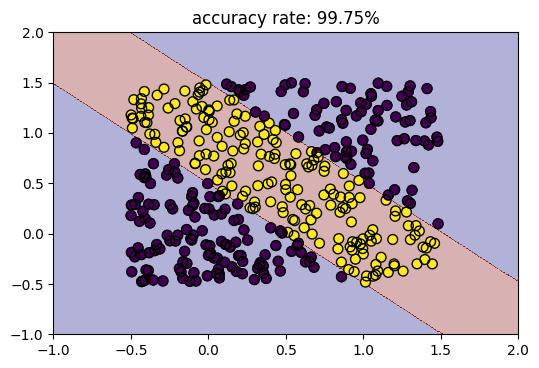

In [ ]:
onemlp1 = MlpOneHiddenLayer(C = 2, hidden_units=10, eta = 1)

onemlp1.fit(X1, y1)
onemlp1.visualize(X1, y1, [-1, 2], [-1, 2])

# Training with other datasets

In [ ]:
center = [0, 0]

N = 100
d0 = 2
C = 4

X = np.zeros((d0, N * C))
y = np.zeros(N * C, dtype='uint8')

k = np.pi * 0.5
ltheta = np.pi * 1.2

for i in range(C):
  r = np.linspace(0, 1, N)
  t = np.linspace(i * k, i * k + ltheta, N) + .2 * np.random.randn(N)
  X[:, N * i: N * (i + 1)] = np.c_[r * np.cos(t), r * np.sin(t)].T 
  y[N * i: N * (i + 1)] = i


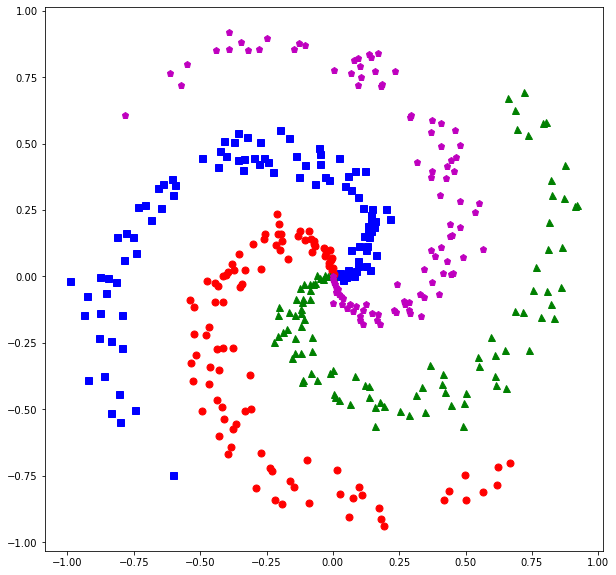

In [ ]:
plt.figure(figsize=(10, 10))

plt.plot(X[0, :N], X[1, :N], 'bs', markersize = 7)
plt.plot(X[0, N:2*N], X[1, N:2*N], 'ro', markersize = 7)
plt.plot(X[0, 2*N:3*N], X[1, 2*N:3*N], 'g^', markersize = 7)
plt.plot(X[0, 3*N:], X[1, 3*N:], 'mp', markersize = 7)

plt.show()

## Using 1 hidden layer

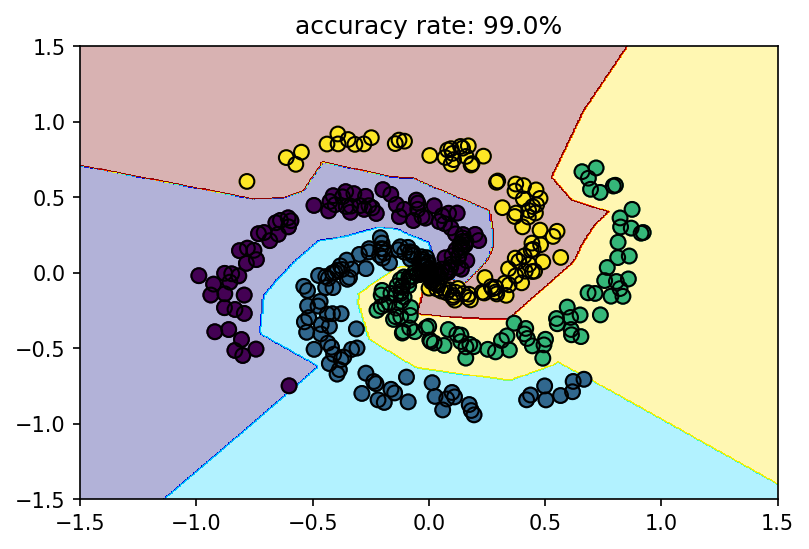

In [ ]:
oneHiddenLayerMLP = MlpOneHiddenLayer(C = 4, hidden_units=50, eta = 1)

oneHiddenLayerMLP.fit(X, y)
oneHiddenLayerMLP.visualize(X, y, [-1.5, 1.5], [-1.5, 1.5], dpi=150)

In [ ]:
loss = oneHiddenLayerMLP.loss_
print(len(loss))
print(np.asarray([loss]).T)

11
[[1.38622769]
 [0.2528486 ]
 [0.09795294]
 [0.0623058 ]
 [0.05072238]
 [0.04395514]
 [0.03947328]
 [0.03616455]
 [0.03365482]
 [0.03168952]
 [0.03012486]]


## Another one

In [ ]:
N2 = 200

C2 = 2

X2 = np.zeros((2, 400))
y2 = np.zeros(400)

k = np.pi * 0.5
ltheta = np.pi

r1 = 2
r2 = 1

for i in range(C2):
  t = np.linspace(0, 2 * np.pi, N2)
  X2[:, N2 * i: N2 * (i + 1)] = np.c_[(r1 - i * .3) * np.cos(t), (r2 - i * .3) * np.sin(t)].T + .05 *  np.random.randn(2, 200)
  y2[N2 * i: N2 * (i + 1)] = i


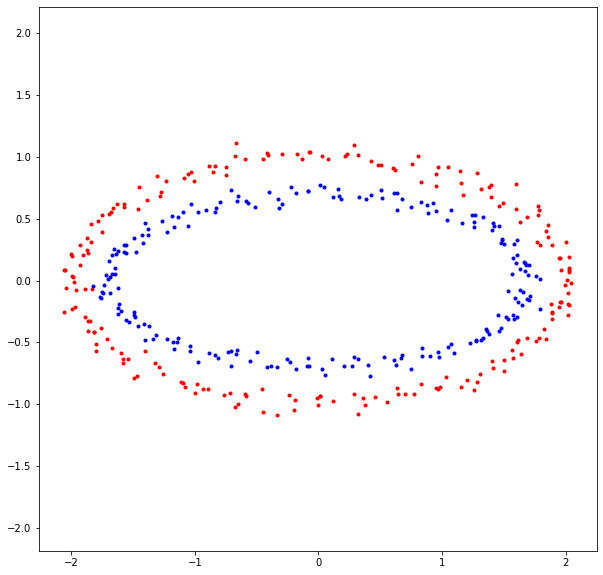

In [ ]:
plt.figure(figsize=(10, 10))

plt.plot(X2[0, :200], X2[1, :200], 'r.')
plt.plot(X2[0, 200:], X2[1, 200:], 'b.')

plt.axis('equal')

plt.show()

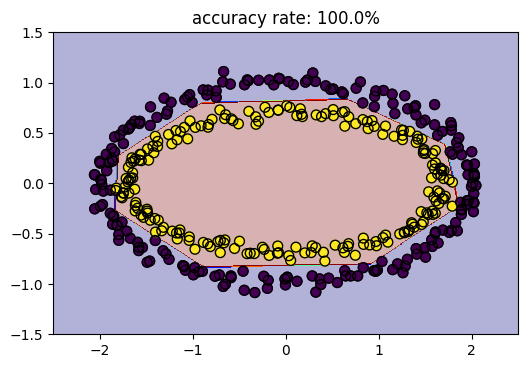

In [ ]:
elipmlp = MlpOneHiddenLayer(C = 2, hidden_units=5, eta = 1)

elipmlp.fit(X2, y2)

elipmlp.visualize(X2, y2, [-2.5, 2.5], [-1.5, 1.5])

## Using multi hidden layers

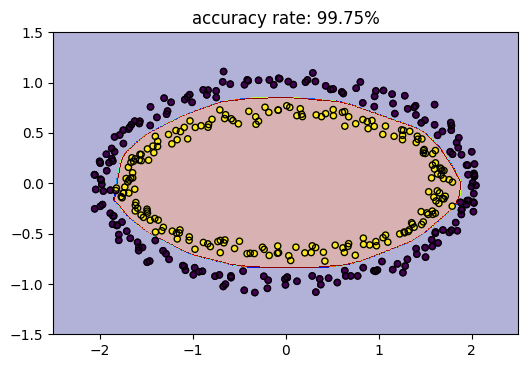

In [ ]:
# def __init__(self, C, N, n, n_hidden_layers = 1, eta = 1)

mlp1 = Mlp(2, [2, 50, 50, 2], eta = .1)

mlp1.fit(X2, y2)
mlp1.visualize(X2, y2, [-2.5, 2.5], [-1.5, 1.5])

In [ ]:
print(np.asarray([mlp1.loss_]).T)

[[0.69314804]
 [0.69313812]
 [0.69312223]
 [0.69307107]
 [0.69273952]
 [0.67866159]
 [0.03455468]
 [0.01282741]
 [0.00868425]
 [0.00700023]
 [0.00605165]]


## 4 classes classification 

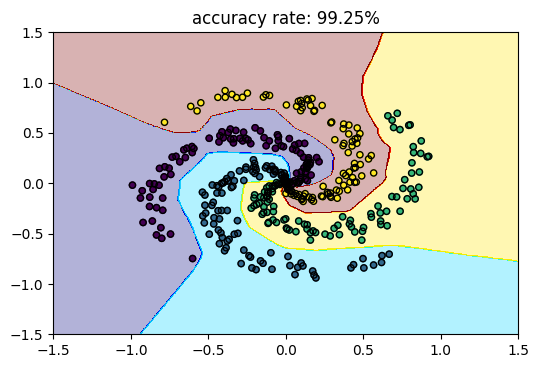

In [ ]:
mlp3 = Mlp(4, [2, 50, 50, 4], eta = 0.1)

mlp3.fit(X, y, epochs=10001)
mlp3.visualize(X, y, [-1.5, 1.5], [-1.5, 1.5])

In [ ]:
print(np.asarray([mlp3.loss_]).T)

[[1.38629349]
 [1.3861015 ]
 [1.16854715]
 [0.78469636]
 [0.19931228]
 [0.07253163]
 [0.04967889]
 [0.04005051]
 [0.03441294]
 [0.03078732]
 [0.02825809]]


## 5-classes classification

In [ ]:
N3 = 400

C3 = 5

X3 = np.zeros((2, N3 * C3))
y3 = np.zeros(N3 * C3)

k = np.pi * 0.5
ltheta = np.pi

r1 = 6
r2 = 6

for i in range(C3):
  t = np.linspace(0, 2 * np.pi, N3)
  X3[:, N3 * i: N3 * (i + 1)] = np.c_[(r1 - i * .8) * np.cos(t), (r2 - i * .8) * np.sin(t)].T + .25 *  np.random.randn(2, N3)
  y3[N3 * i: N3 * (i + 1)] = i


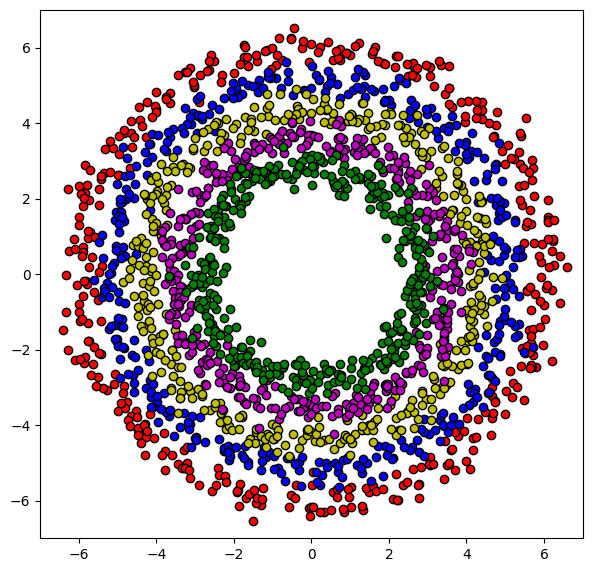

In [ ]:
plt.figure(figsize=(7, 7), dpi=100)

plt.plot(X3[0, :N3], X3[1, :N3], 'ro', markeredgecolor='k')
plt.plot(X3[0, N3:N3 * 2], X3[1, N3:N3 * 2], 'bo', markeredgecolor='k')
plt.plot(X3[0, N3 * 2:N3 * 3], X3[1, N3 * 2:N3 * 3], 'yo', markeredgecolor='k')
plt.plot(X3[0, N3 * 3:N3 * 4], X3[1, N3 * 3:N3 * 4], 'mo', markeredgecolor='k')
plt.plot(X3[0, N3 * 4:], X3[1, N3 * 4:], 'go', markeredgecolor='k')

plt.axis([-7, 7, -7, 7])
plt.show()

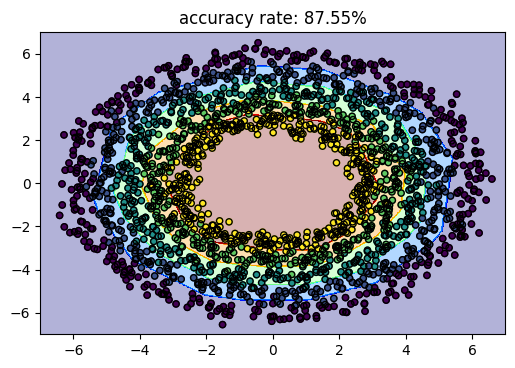

In [ ]:
mlp4 = Mlp(5, [2, 10, 10, 5], eta = 0.1)

mlp4.fit(X3, y3)
mlp4.visualize(X3, y3, [-7, 7], [-7, 7], dpi=100)

# Moon dataset

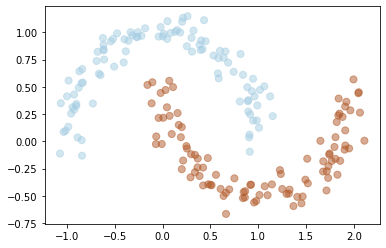

In [ ]:
def make_moon_data(n_samples, noise=0.1):
  noisy_moons = datasets.make_moons(n_samples=n_samples, noise=noise, random_state=6)
  return noisy_moons[0], noisy_moons[1]


n_data = 200
X_moon, y_moon = make_moon_data(n_data)
X_moon = X_moon.T
# y_moon = y_moon.reshape(1, n_data)


plt.scatter(X_moon[0], X_moon[1], c=y_moon, s=50, cmap=plt.cm.Paired, alpha=.5)
plt.show()

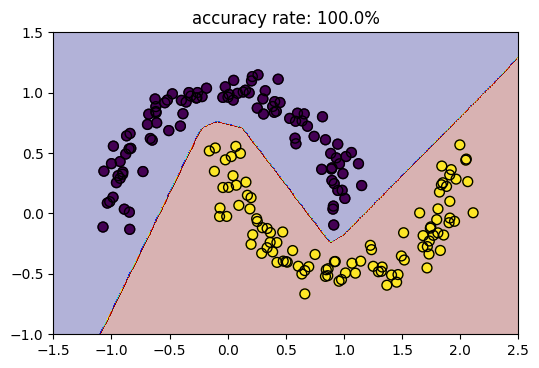

In [ ]:
moon_mlp_1 = MlpOneHiddenLayer(2,hidden_units=50, eta = 1)

moon_mlp_1.fit(X_moon, y_moon)
moon_mlp_1.visualize(X_moon, y_moon, [-1.5, 2.5], [-1, 1.5])

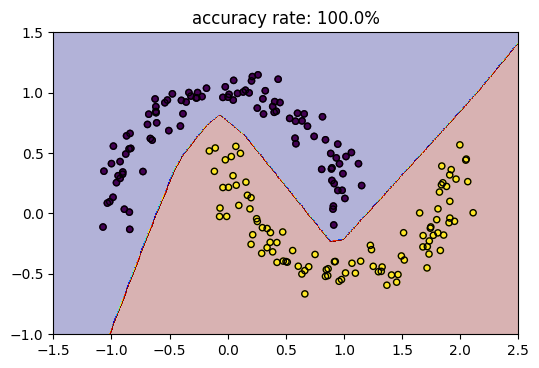

In [ ]:
moon_mlp_2 = Mlp(2, [2, 20, 50, 2], eta = 0.5)

moon_mlp_2.fit(X_moon, y_moon)
moon_mlp_2.visualize(X_moon, y_moon, [-1.5, 2.5], [-1, 1.5])

# MNIST dataset

In [ ]:
X_mnist = mnist.data.astype('float32')
y_mnist = mnist.target.astype('int64')
X_tr_mn, X_ts_mn, y_tr_mn, y_ts_mn = train_test_split(X_mnist, y_mnist, test_size=0.25, random_state=42)

x_tr_mn = X_tr_mn.to_numpy()[:2000].T / 255
x_ts_mn = X_ts_mn.to_numpy()[:1000].T / 255
y_tr_mn = y_tr_mn[:2000]
y_ts_mn = y_ts_mn[:1000]

In [ ]:
mnist_mlp_1 = MlpOneHiddenLayer(10,hidden_units=50, eta = 1)

mnist_mlp_1.fit(x_tr_mn, y_tr_mn)

In [ ]:
pred_result = mnist_mlp_1.predict(x_ts_mn)
print(f'accuracy score: {accuracy_score(pred_result, y_ts_mn) * 100} %')

accuracy score: 92.30000000000001 %


In [ ]:
mnist_mlp_2 = Mlp(10, [784, 50, 50, 10], eta = 0.5)

mnist_mlp_2.fit(x_tr_mn, y_tr_mn)

In [ ]:
pred_result = mnist_mlp_2.predict(x_ts_mn)
print(f'accuracy score: {accuracy_score(pred_result, y_ts_mn) * 100} %')

accuracy score: 92.2 %


# CIFAR-10 dataset

In [4]:
# load dataset
(x_tr_cifar, y_tr_cifar), (x_ts_cifar, y_ts_cifar) = cifar10.load_data()

# get the first 2000 train data and 200 test data
x_tr_cifar = x_tr_cifar[:2000] / 255.0
y_tr_cifar = y_tr_cifar[:2000].ravel()
x_ts_cifar = x_ts_cifar[:200] / 255.0
y_ts_cifar = y_ts_cifar[:200].ravel()

170508288/170498071 [==============================] - 4s 0us/step


In [5]:
# disable grayscale
cifarX_train = x_tr_cifar.reshape(x_tr_cifar.shape[0], -1).T
cifarX_test = x_ts_cifar.reshape(x_ts_cifar.shape[0], -1).T

# applying grayscale
cifarX_train_gray = np.dot(x_tr_cifar[:,:,:,:3], [0.299, 0.587, 0.114])
cifarX_test_gray = np.dot(x_ts_cifar[:,:,:,:3], [0.299, 0.587, 0.114])
cifarX_train_gray = cifarX_train_gray.reshape(cifarX_train_gray.shape[0], -1).T
cifarX_test_gray = cifarX_test_gray.reshape(cifarX_test_gray.shape[0], -1).T

In [6]:
cifarX_train.shape

(3072, 2000)

In [ ]:
cifar_mlp_1 = MlpOneHiddenLayer(10,hidden_units=100, eta = 1)

cifar_mlp_1.fit(cifarX_train, y_tr_cifar, batch_size=200)

pred_result = cifar_mlp_1.predict(cifarX_test)
print(f'accuracy score: {accuracy_score(pred_result, y_ts_cifar) * 100} %')

accuracy score: 7.5 %


In [7]:
cifar_mlp_2 = Mlp(10, [3072, 50, 50, 10], eta = 0.5)

cifar_mlp_2.fit(cifarX_train, y_tr_cifar, batch_size=200)

pred_result = cifar_mlp_2.predict(cifarX_test)
print(f'accuracy score: {accuracy_score(pred_result, y_ts_cifar) * 100} %')

accuracy score: 24.5 %


## I don't know why result is so poor, not even 10% :(